# Flight Price Prediction: 

-  The problem is to create a predictive model that accurately estimates the price of a flight ticket. The model will take into    account several features including the airline, flight duration, departure time, and the number of days left until departure.    The goal is to use this model to assist consumers or businesses in making informed decisions about purchasing flight tickets    by predicting the likely cost based on these factors. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)


# Loading data

In [3]:
df=pd.read_csv(r"D:\desktop\CDAC_project\Project data\flight_final.csv")

In [4]:
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi     After 6 PM  zero   
1                1  SpiceJet  SG-8157       Delhi    Before 6 AM  zero   
2                2   AirAsia   I5-764       Delhi    Before 6 AM  zero   
3                3   Vistara   UK-995       Delhi   6 AM - 12 PM  zero   
4                4   Vistara   UK-963       Delhi   6 AM - 12 PM  zero   
...            ...       ...      ...         ...            ...   ...   
752236      452083   Vistara   UK-926   Ahmedabad   6 AM - 12 PM   one   
752237      452084   Vistara   UK-918   Ahmedabad    Before 6 AM   one   
752238      452085   Vistara   UK-918   Ahmedabad    Before 6 AM   one   
752239      452086   Vistara   UK-946   Ahmedabad   6 AM - 12 PM   one   
752240      452087   Vistara   UK-946   Ahmedabad   6 AM - 12 PM   one   

        arrival_time destination_city     class  duration  days_left  price  
0         After 6 PM           Mumbai   Economy    2.1700          1   5953  
1       6 AM - 12 PM           Mumbai   Economy    2.3300          1   5953  
2       Before 6 AM            Mumbai   Economy    2.1700          1   5956  
3       12 PM - 6 PM           Mumbai   Economy    2.2500          1   5955  
4       6 AM - 12 PM           Mumbai   Economy    2.3300          1   5955  
...              ...              ...       ...       ...        ...    ...  
752236    After 6 PM          Chennai  Business   13.0833         50  65028  
752237  12 PM - 6 PM          Chennai  Business   11.2500         50  69254  
752238  12 PM - 6 PM          Chennai  Business   11.2500         50  69254  
752239    After 6 PM          Chennai  Business   11.1667         50  72980  
752240    After 6 PM          Chennai  Business   11.1667         50  72980  

[752241 rows x 12 columns]

# Data inspection 

#### Shape of the dataset

In [5]:
df.shape

(752241, 12)

#### Summary of the dataset

In [6]:
df.describe()

Unnamed: 0       duration      days_left          price
count  752241.000000  752241.000000  752241.000000  752241.000000
mean   195731.574663      12.298068      25.778269   22061.852260
std    120894.908662       7.337123      14.011532   21315.101084
min         0.000000       0.750000       1.000000    1105.000000
25%     94030.000000       6.666700      14.000000    6489.000000
50%    188060.000000      11.330000      26.000000   11817.000000
75%    282090.000000      16.333300      38.000000   39377.000000
max    452087.000000      49.830000      50.000000  143019.000000

In [7]:
# Information about the data, Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752241 entries, 0 to 752240
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        752241 non-null  int64  
 1   airline           752241 non-null  object 
 2   flight            752241 non-null  object 
 3   source_city       752241 non-null  object 
 4   departure_time    752241 non-null  object 
 5   stops             752241 non-null  object 
 6   arrival_time      752241 non-null  object 
 7   destination_city  752241 non-null  object 
 8   class             752241 non-null  object 
 9   duration          752241 non-null  float64
 10  days_left         752241 non-null  int64  
 11  price             752241 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 68.9+ MB


# Exploratory Data Analysis (EDA)

In [8]:
df.airline.value_counts()

Vistara        359349
Air India      119841
Indigo         108779
Air_India       80892
AirAsia         31862
GO_FIRST        23173
SpiceJet        14874
GO FIRST        10786
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: airline, dtype: int64

In [9]:
idx=np.where(df.airline=='Air India')[0]
df.airline[idx]='Air_India'

In [10]:
df.airline.value_counts()

Vistara        359349
Air_India      200733
Indigo         108779
AirAsia         31862
GO_FIRST        23173
SpiceJet        14874
GO FIRST        10786
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: airline, dtype: int64

In [11]:
idx1=np.where(df.airline=='GO FIRST')[0]
df.airline[idx1]='GO_FIRST'

In [12]:
df.airline.value_counts()

Vistara        359349
Air_India      200733
Indigo         108779
GO_FIRST        33959
AirAsia         31862
SpiceJet        14874
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: airline, dtype: int64

#### Bar chart showing most preferred Airlines to least

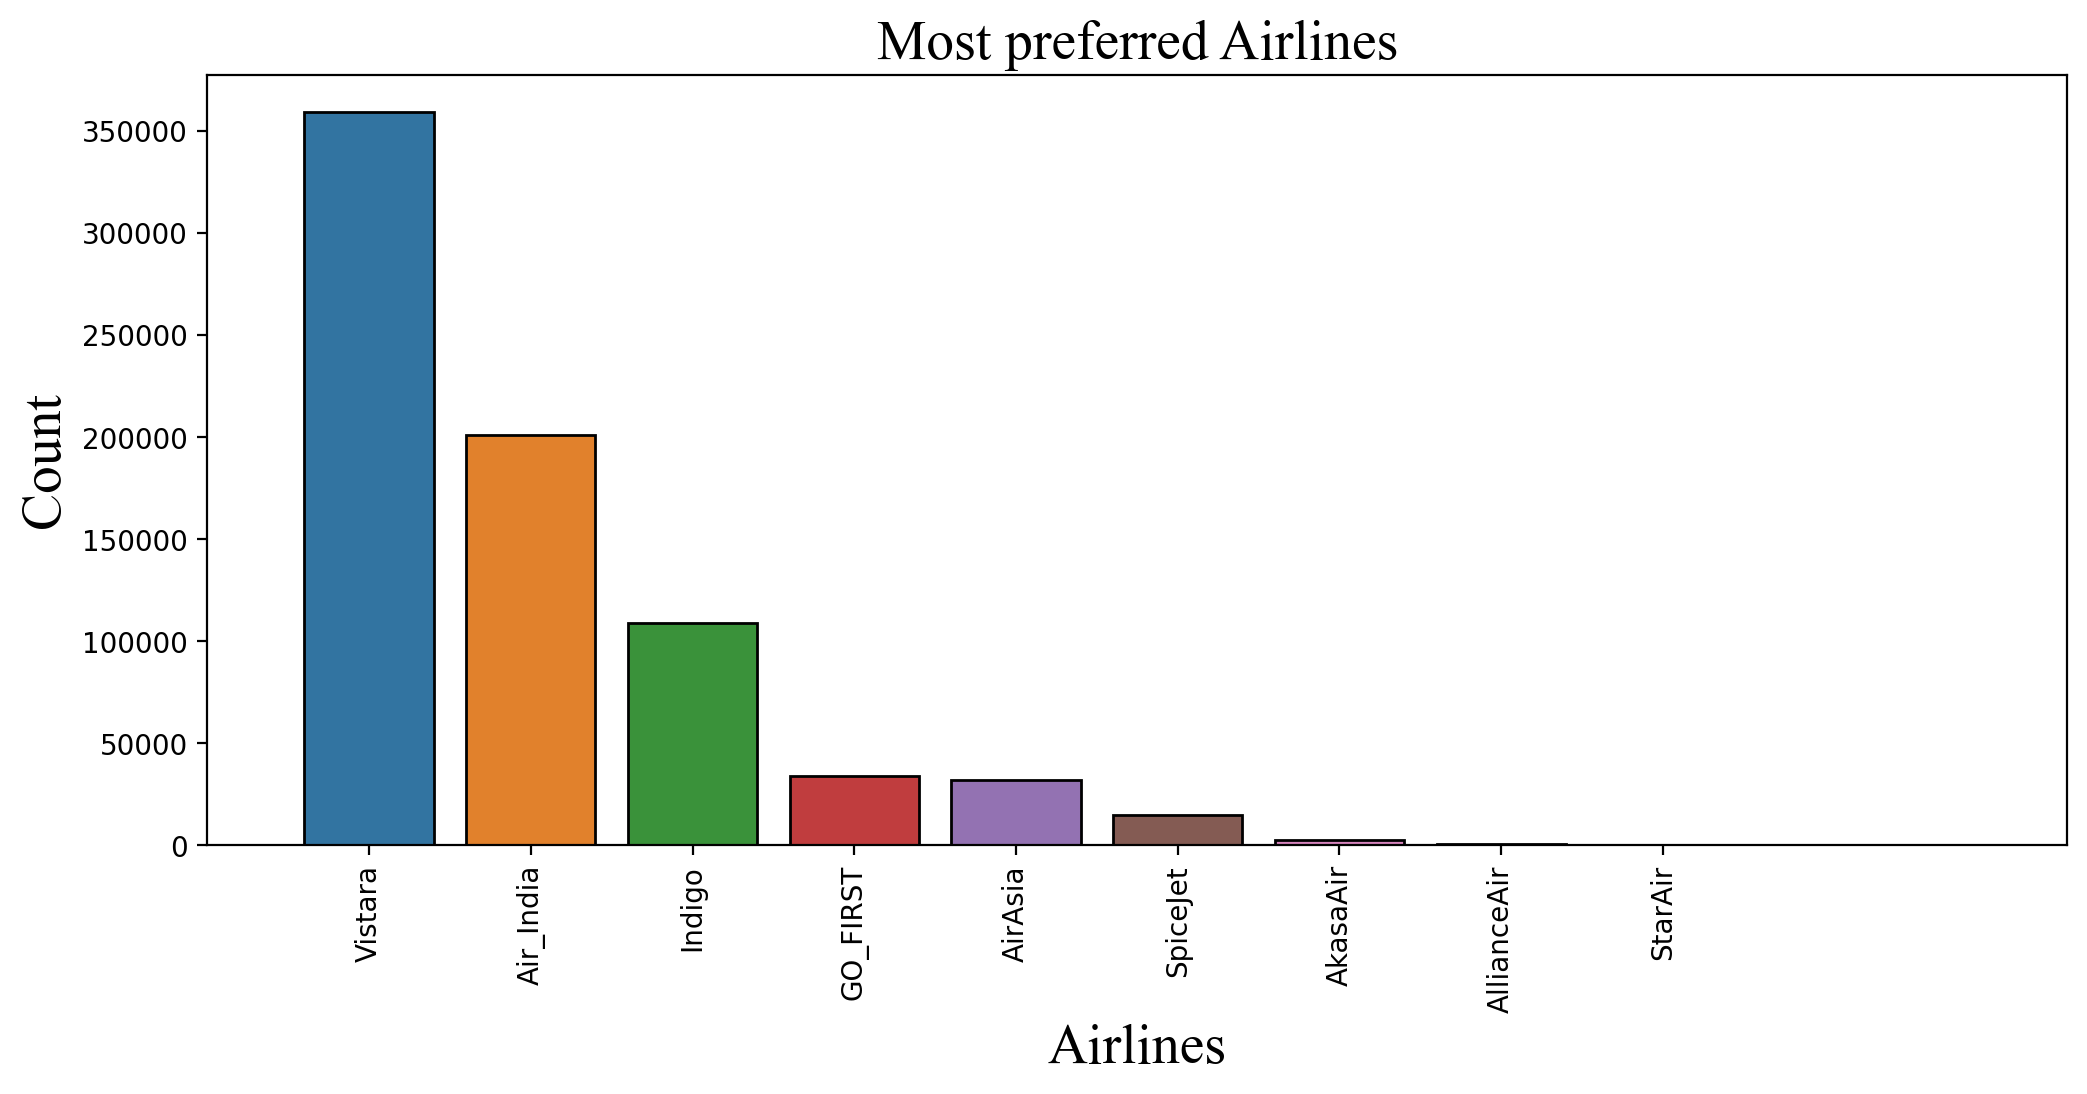

In [13]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x="airline", data=df,order = df['airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

#### Removing the airlines which are not used by users frequently

In [14]:
# idx1=np.where(df.airline=='StarAir')[0]
# idx2=np.where(df.airline=='AllianceAir')[0]
# idx3=np.where(df.airline=='AkasaAir')[0]

In [15]:
# df.drop(index=idx1,inplace=True)
# df.drop(index=idx2,inplace=True)
# df.drop(index=idx3,inplace=True)

In [16]:
df.airline.value_counts()

Vistara        359349
Air_India      200733
Indigo         108779
GO_FIRST        33959
AirAsia         31862
SpiceJet        14874
AkasaAir         2230
AllianceAir       393
StarAir            62
Name: airline, dtype: int64

#### Airlines Vs Flight ticket Price

In [17]:
airlines = df.groupby('airline').price.max()
airlines_df= airlines.to_frame().sort_values('price',ascending=False)
airlines_df

price
airline            
Vistara      143019
Air_India    109399
Indigo        44736
GO_FIRST      39687
StarAir       35520
SpiceJet      34158
AirAsia       32743
AkasaAir      16117
AllianceAir    7792

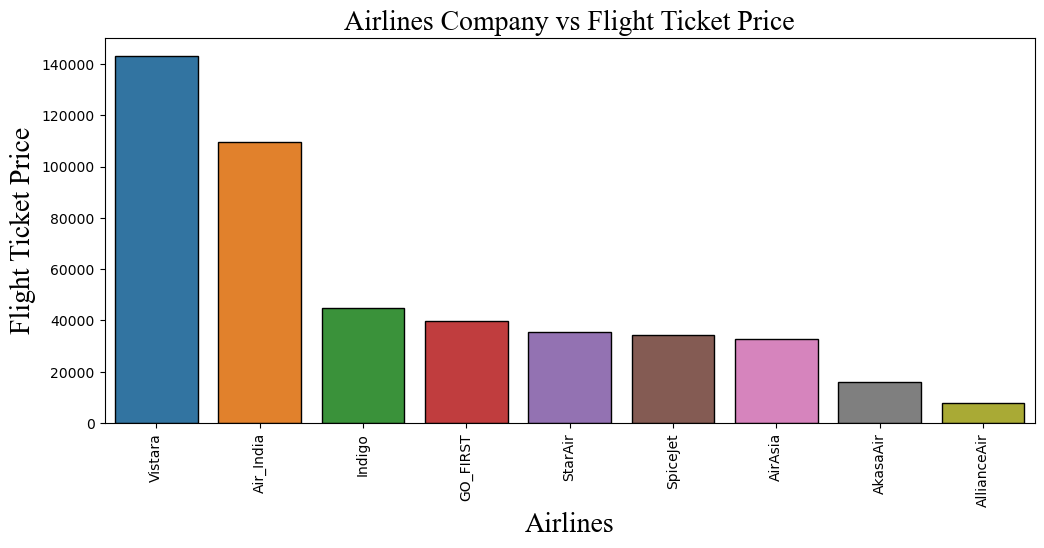

In [18]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()


In [19]:
df.source_city.value_counts()

Delhi        144496
Mumbai       141619
Bangalore    125436
Kolkata      101907
Hyderabad     97463
Chennai       95214
Ahmedabad     46106
Name: source_city, dtype: int64

In [20]:
df.destination_city.value_counts()

Mumbai       142092
Delhi        135099
Bangalore    123412
Hyderabad    105265
Kolkata      103981
Chennai       97957
Ahmedabad     44435
Name: destination_city, dtype: int64

In [21]:
df.departure_time.value_counts()

6 AM - 12 PM    256126
After 6 PM      242392
12 PM - 6 PM    163568
Before 6 AM      90155
Name: departure_time, dtype: int64

In [22]:
df.arrival_time.value_counts()

After 6 PM      384128
6 AM - 12 PM    182379
12 PM - 6 PM    139552
Before 6 AM      30765
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [23]:
df.stops.value_counts()

one            620513
zero            87759
two_or_more     43969
Name: stops, dtype: int64

In [24]:
df.arrival_time.value_counts()

After 6 PM      384128
6 AM - 12 PM    182379
12 PM - 6 PM    139552
Before 6 AM      30765
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [25]:
idx = df.index[df['arrival_time'] == 'Before 6 AM']
df.loc[idx, 'arrival_time'] = 'Before_6_AM'

In [26]:
df.arrival_time.value_counts()

After 6 PM      384128
6 AM - 12 PM    182379
12 PM - 6 PM    139552
Before_6_AM      30765
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [27]:
df.rename(columns={'class': 'class_type'}, inplace=True)

In [28]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class_type', 'duration',
       'days_left', 'price'],
      dtype='object')

In [29]:
df.arrival_time.value_counts()

After 6 PM      384128
6 AM - 12 PM    182379
12 PM - 6 PM    139552
Before_6_AM      30765
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [30]:
df.stops.value_counts()

one            620513
zero            87759
two_or_more     43969
Name: stops, dtype: int64

In [31]:
df['class_type'].value_counts()

Economy     531776
Business    220465
Name: class_type, dtype: int64

In [32]:
df.arrival_time.value_counts()

After 6 PM      384128
6 AM - 12 PM    182379
12 PM - 6 PM    139552
Before_6_AM      30765
Before 6 AM      15417
Name: arrival_time, dtype: int64

In [33]:
idx1 = df.index[df['arrival_time'] == 'After 6 PM']
idx2 = df.index[df['arrival_time'] == '6 AM - 12 PM']
idx3 = df.index[df['arrival_time'] == '12 PM - 6 PM']
idx4 = df.index[df['arrival_time'] == 'Before 6 AM ']


In [34]:
df.loc[idx1, 'arrival_time'] = 'After_6_PM'
df.loc[idx2, 'arrival_time'] = '6_AM_12_PM'
df.loc[idx3, 'arrival_time'] = '12_PM_6_PM'
df.loc[idx4, 'arrival_time'] = 'Before_6_AM'

In [35]:
df.arrival_time.value_counts()

After_6_PM     384128
6_AM_12_PM     182379
12_PM_6_PM     139552
Before_6_AM     46182
Name: arrival_time, dtype: int64

In [36]:
idx1 = df.index[df['departure_time'] == 'After 6 PM']
idx2 = df.index[df['departure_time'] == '6 AM - 12 PM']
idx3 = df.index[df['departure_time'] == '12 PM - 6 PM']
idx4 = df.index[df['departure_time'] == 'Before 6 AM']

In [37]:
df.loc[idx1, 'departure_time'] = 'After_6_PM'
df.loc[idx2, 'departure_time'] = '6_AM_12_PM'
df.loc[idx3, 'departure_time'] = '12_PM_6_PM'
df.loc[idx4, 'departure_time'] = 'Before_6_AM'

In [38]:
df.departure_time.value_counts()

6_AM_12_PM     256126
After_6_PM     242392
12_PM_6_PM     163568
Before_6_AM     90155
Name: departure_time, dtype: int64

In [39]:
df.duration.value_counts()

2.2500     9025
2.7500     5157
8.0000     4833
6.2500     4810
12.2500    4510
           ... 
40.0833       1
32.4167       1
35.6700       1
42.9167       1
38.0833       1
Name: duration, Length: 803, dtype: int64

In [40]:
df.duration.min()

0.75

In [41]:
df.duration.max()

49.83

In [42]:
df.duration.median()

11.33

In [43]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class_type', 'duration',
       'days_left', 'price'],
      dtype='object')

# Preprocessing

In [44]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)
df['class_type']=df['class_type'].apply(lambda x:1 if x=='Business' else 0)

In [45]:
pd.factorize(df.stops)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [46]:
df.stops=pd.factorize(df.stops)[0]

In [47]:
# df=df.join(pd.get_dummies(df.airline,prefix='airline')).drop('airline',axis=1)

# Using Encoding to Handle categorical data
##### Features with Categorical data
   * Airline
   * Source
   * Destination
 - Apply Label Encoder to these features.


In [48]:
#df=df.join(pd.get_dummies(df.source_city,prefix='source')).drop('source_city',axis=1)
#df=df.join(pd.get_dummies(df.destination_city,prefix='destination')).drop('destination_city',axis=1)
#df=df.join(pd.get_dummies(df.arrival_time,prefix='arrival')).drop('arrival_time',axis=1)
#df=df.join(pd.get_dummies(df.departure_time,prefix='departure')).drop('departure_time',axis=1)

In [49]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store the encoders
encoders = {}

# Encode 'source_city'
encoders['airline'] = LabelEncoder()
df['airline'] = encoders['airline'].fit_transform(df['airline'])

encoders['source_city'] = LabelEncoder()
df['source_city'] = encoders['source_city'].fit_transform(df['source_city'])

# Encode 'destination_city'
encoders['destination_city'] = LabelEncoder()
df['destination_city'] = encoders['destination_city'].fit_transform(df['destination_city'])

# Encode 'arrival_time'
encoders['arrival_time'] = LabelEncoder()
df['arrival_time'] = encoders['arrival_time'].fit_transform(df['arrival_time'])

# Encode 'departure_time'
encoders['departure_time'] = LabelEncoder()
df['departure_time'] = encoders['departure_time'].fit_transform(df['departure_time'])

# Save the encoders to a pickle file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)


In [50]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# le = LabelEncoder()

# # Convert 'source_city' using label encoding
# df['source_city'] = le.fit_transform(df['source_city'])

# # Convert 'destination_city' using label encoding
# df['destination_city'] = le.fit_transform(df['destination_city'])

# # Convert 'arrival_time' using label encoding
# df['arrival_time'] = le.fit_transform(df['arrival_time'])

# # Convert 'departure_time' using label encoding
# df['departure_time'] = le.fit_transform(df['departure_time'])


In [51]:
df

airline  source_city  departure_time  stops  arrival_time  \
0             6            3               2      0             2   
1             6            3               3      0             1   
2             0            3               3      0             3   
3             8            3               1      0             0   
4             8            3               1      0             1   
...         ...          ...             ...    ...           ...   
752236        8            0               1      1             2   
752237        8            0               3      1             0   
752238        8            0               3      1             0   
752239        8            0               1      1             2   
752240        8            0               1      1             2   

        destination_city  class_type  duration  days_left  price  
0                      6           0    2.1700          1   5953  
1                      6           0    2.3300          1   5953  
2                      6           0    2.1700          1   5956  
3                      6           0    2.2500          1   5955  
4                      6           0    2.3300          1   5955  
...                  ...         ...       ...        ...    ...  
752236                 2           1   13.0833         50  65028  
752237                 2           1   11.2500         50  69254  
752238                 2           1   11.2500         50  69254  
752239                 2           1   11.1667         50  72980  
752240                 2           1   11.1667         50  72980  

[752241 rows x 10 columns]

In [52]:
df['source_city'].unique()

array([3, 6, 1, 5, 4, 2, 0])

In [53]:
df['destination_city'].unique()

array([6, 1, 5, 4, 2, 3, 0])

In [54]:
df['arrival_time'].unique()

array([2, 1, 3, 0])

In [55]:
df['departure_time'].unique()

array([2, 3, 1, 0])

In [56]:
# checking duplicate values

df.duplicated().sum()

15917

In [57]:
# Dropping duplicate values

df=df.drop_duplicates()

<Axes: >

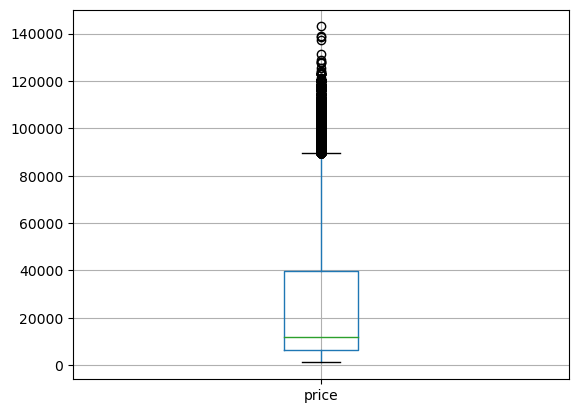

In [58]:
df.boxplot('price')

In [59]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df

airline  source_city  departure_time  stops  arrival_time  \
0             6            3               2      0             2   
1             6            3               3      0             1   
2             0            3               3      0             3   
3             8            3               1      0             0   
4             8            3               1      0             1   
...         ...          ...             ...    ...           ...   
752234        8            0               3      1             0   
752235        8            0               1      1             2   
752236        8            0               1      1             2   
752237        8            0               3      1             0   
752239        8            0               1      1             2   

        destination_city  class_type  duration  days_left  price  
0                      6           0    2.1700          1   5953  
1                      6           0    2.3300          1   5953  
2                      6           0    2.1700          1   5956  
3                      6           0    2.2500          1   5955  
4                      6           0    2.3300          1   5955  
...                  ...         ...       ...        ...    ...  
752234                 2           1   11.2500         50  61302  
752235                 2           1   11.1667         50  65028  
752236                 2           1   13.0833         50  65028  
752237                 2           1   11.2500         50  69254  
752239                 2           1   11.1667         50  72980  

[733505 rows x 10 columns]

<Axes: >

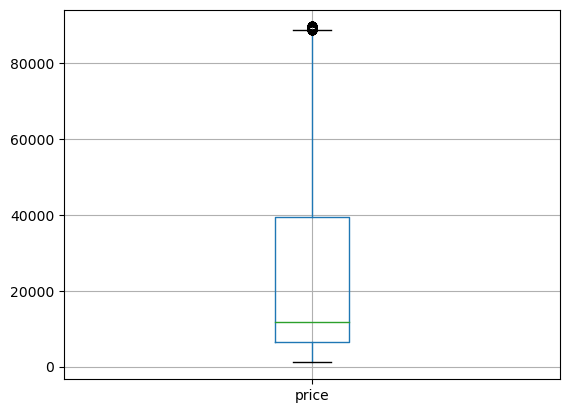

In [60]:
df.boxplot('price')

# Feature Selection
   * Finding out the best feature which will contribute and have good relation with the target variable(Price).
   * Let's use heat map to find correlation between features.

In [61]:
plt.figure(figsize=(30,15),dpi=500)

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

In [62]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
class_type          0.912749
duration            0.193080
airline             0.135783
stops               0.120108
destination_city    0.015977
source_city         0.012232
departure_time     -0.003333
arrival_time       -0.011323
days_left          -0.078581
Name: price, dtype: float64

## There is a high correlation between:
   * Price & class
   * Duration & Total stops

# Building Machine Learning models

   For predicting the Price, we build 3 models using the following algorithms:

     * K neighnors regressor
     * Decision Tree regressor
     * Random Forest Regressor

 - Compare the accuracies got from these 3 models and select the best model. Apply hyperparameter tuning to increase its
   efficiency.

# Training regresssion model

In [63]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class_type', 'duration', 'days_left', 'price'],
      dtype='object')

### Standardization of data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y=df.drop('price',axis=1),df.price

In [65]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
752234    61302
752235    65028
752236    65028
752237    69254
752239    72980
Name: price, Length: 733505, dtype: int64

In [66]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

## Import models

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [68]:
def predict(algorithm):
    print('Algorithm',algorithm)
    model=algorithm.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print("Predict price values are : ",ypred)
    print('\n')
    r2=r2_score(ytest,ypred)
    print("r2 Score" , r2)
    
    print('MAE',mean_absolute_error(ytest,ypred))
    print('MSE',mean_squared_error(ytest,ypred))
    print('RMSE',math.sqrt(mean_squared_error(ytest,ypred)))
    
    return(r2)

In [69]:
df['airline'].unique()

array([6, 0, 8, 4, 5, 1, 2, 3, 7])

In [70]:
rf=predict(RandomForestRegressor())


Algorithm RandomForestRegressor()
Predict price values are :  [ 5653.   57966.09  6414.81 ... 50698.43 18009.43  6806.71]


r2 Score 0.9600042533264265
MAE 2168.0106724750726
MSE 17488595.117794584
RMSE 4181.936766355343


In [71]:
knn=predict(KNeighborsRegressor())


Algorithm KNeighborsRegressor()
Predict price values are :  [ 3632.  49478.2 21419.6 ... 40706.  11856.8 10762. ]


r2 Score 0.7871969069262371
MAE 6588.468328095923
MSE 93050572.72603433
RMSE 9646.272478322097


In [72]:
dt=predict(DecisionTreeRegressor())


Algorithm DecisionTreeRegressor()
Predict price values are :  [ 5653. 57920.  6067. ... 47220. 18216.  6590.]


r2 Score 0.9361187311124027
MAE 2488.3384257776024
MSE 27932811.3637724
RMSE 5285.150079588318


In [73]:
#storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

Model   Accuracy
0  K-Nearest Neighbour  78.719691
1        Decision Tree  93.611873
2        Random Forest  96.000425

   - The 'Random Forest Regressor' model turned out to be the most accurate one out of the 3 models.
     Let's try to improve the accuracy by doing Hyperparameter tuning.

# Hyperparameter tuning
    
   * Applying Random Search to find the best parameters

In [74]:
df

airline  source_city  departure_time  stops  arrival_time  \
0             6            3               2      0             2   
1             6            3               3      0             1   
2             0            3               3      0             3   
3             8            3               1      0             0   
4             8            3               1      0             1   
...         ...          ...             ...    ...           ...   
752234        8            0               3      1             0   
752235        8            0               1      1             2   
752236        8            0               1      1             2   
752237        8            0               3      1             0   
752239        8            0               1      1             2   

        destination_city  class_type  duration  days_left  price  
0                      6           0    2.1700          1   5953  
1                      6           0    2.3300          1   5953  
2                      6           0    2.1700          1   5956  
3                      6           0    2.2500          1   5955  
4                      6           0    2.3300          1   5955  
...                  ...         ...       ...        ...    ...  
752234                 2           1   11.2500         50  61302  
752235                 2           1   11.1667         50  65028  
752236                 2           1   13.0833         50  65028  
752237                 2           1   11.2500         50  69254  
752239                 2           1   11.1667         50  72980  

[733505 rows x 10 columns]

In [75]:
df.days_left.describe()

count    733505.000000
mean         25.794331
std          13.995814
min           1.000000
25%          14.000000
50%          26.000000
75%          38.000000
max          50.000000
Name: days_left, dtype: float64

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1,random_state=42)
# Initialize the model
model = RandomForestRegressor(warm_start=True)  # Enable warm_start to speed up the process

# Define the parameter grid (with fewer options to speed up the search)
param_grid = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt', 'log2', None] 
}

# Set up RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_grid, 
                                   n_iter=30,  # Number of parameter settings sampled
                                   cv=3,  # Fewer folds to speed up
                                   n_jobs=-1,  # Use all available cores
                                   verbose=2,  # Detailed output
                                   random_state=42)

# Fit the random search to the sampled data
random_search.fit(xtrain, ytrain)

# Output the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best model found on the entire dataset
best_model = random_search.best_estimator_

# Fit the best model on the entire dataset
best_model.fit(X, y)



Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
Best Score: 0.9623887616171553


RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, warm_start=True)

In [77]:
best_model.score(xtest,ytest)

0.9640297044431276

In [78]:
ypred=best_model.predict(xtest)

print('R2',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',math.sqrt(mean_squared_error(ytest,ypred)))


R2 0.9640297044431276
MAE 2091.478501475934
MSE 15752201.769058136
RMSE 3968.9043537301495


Text(0.5, 1.0, 'Predicted vs Actual Price')

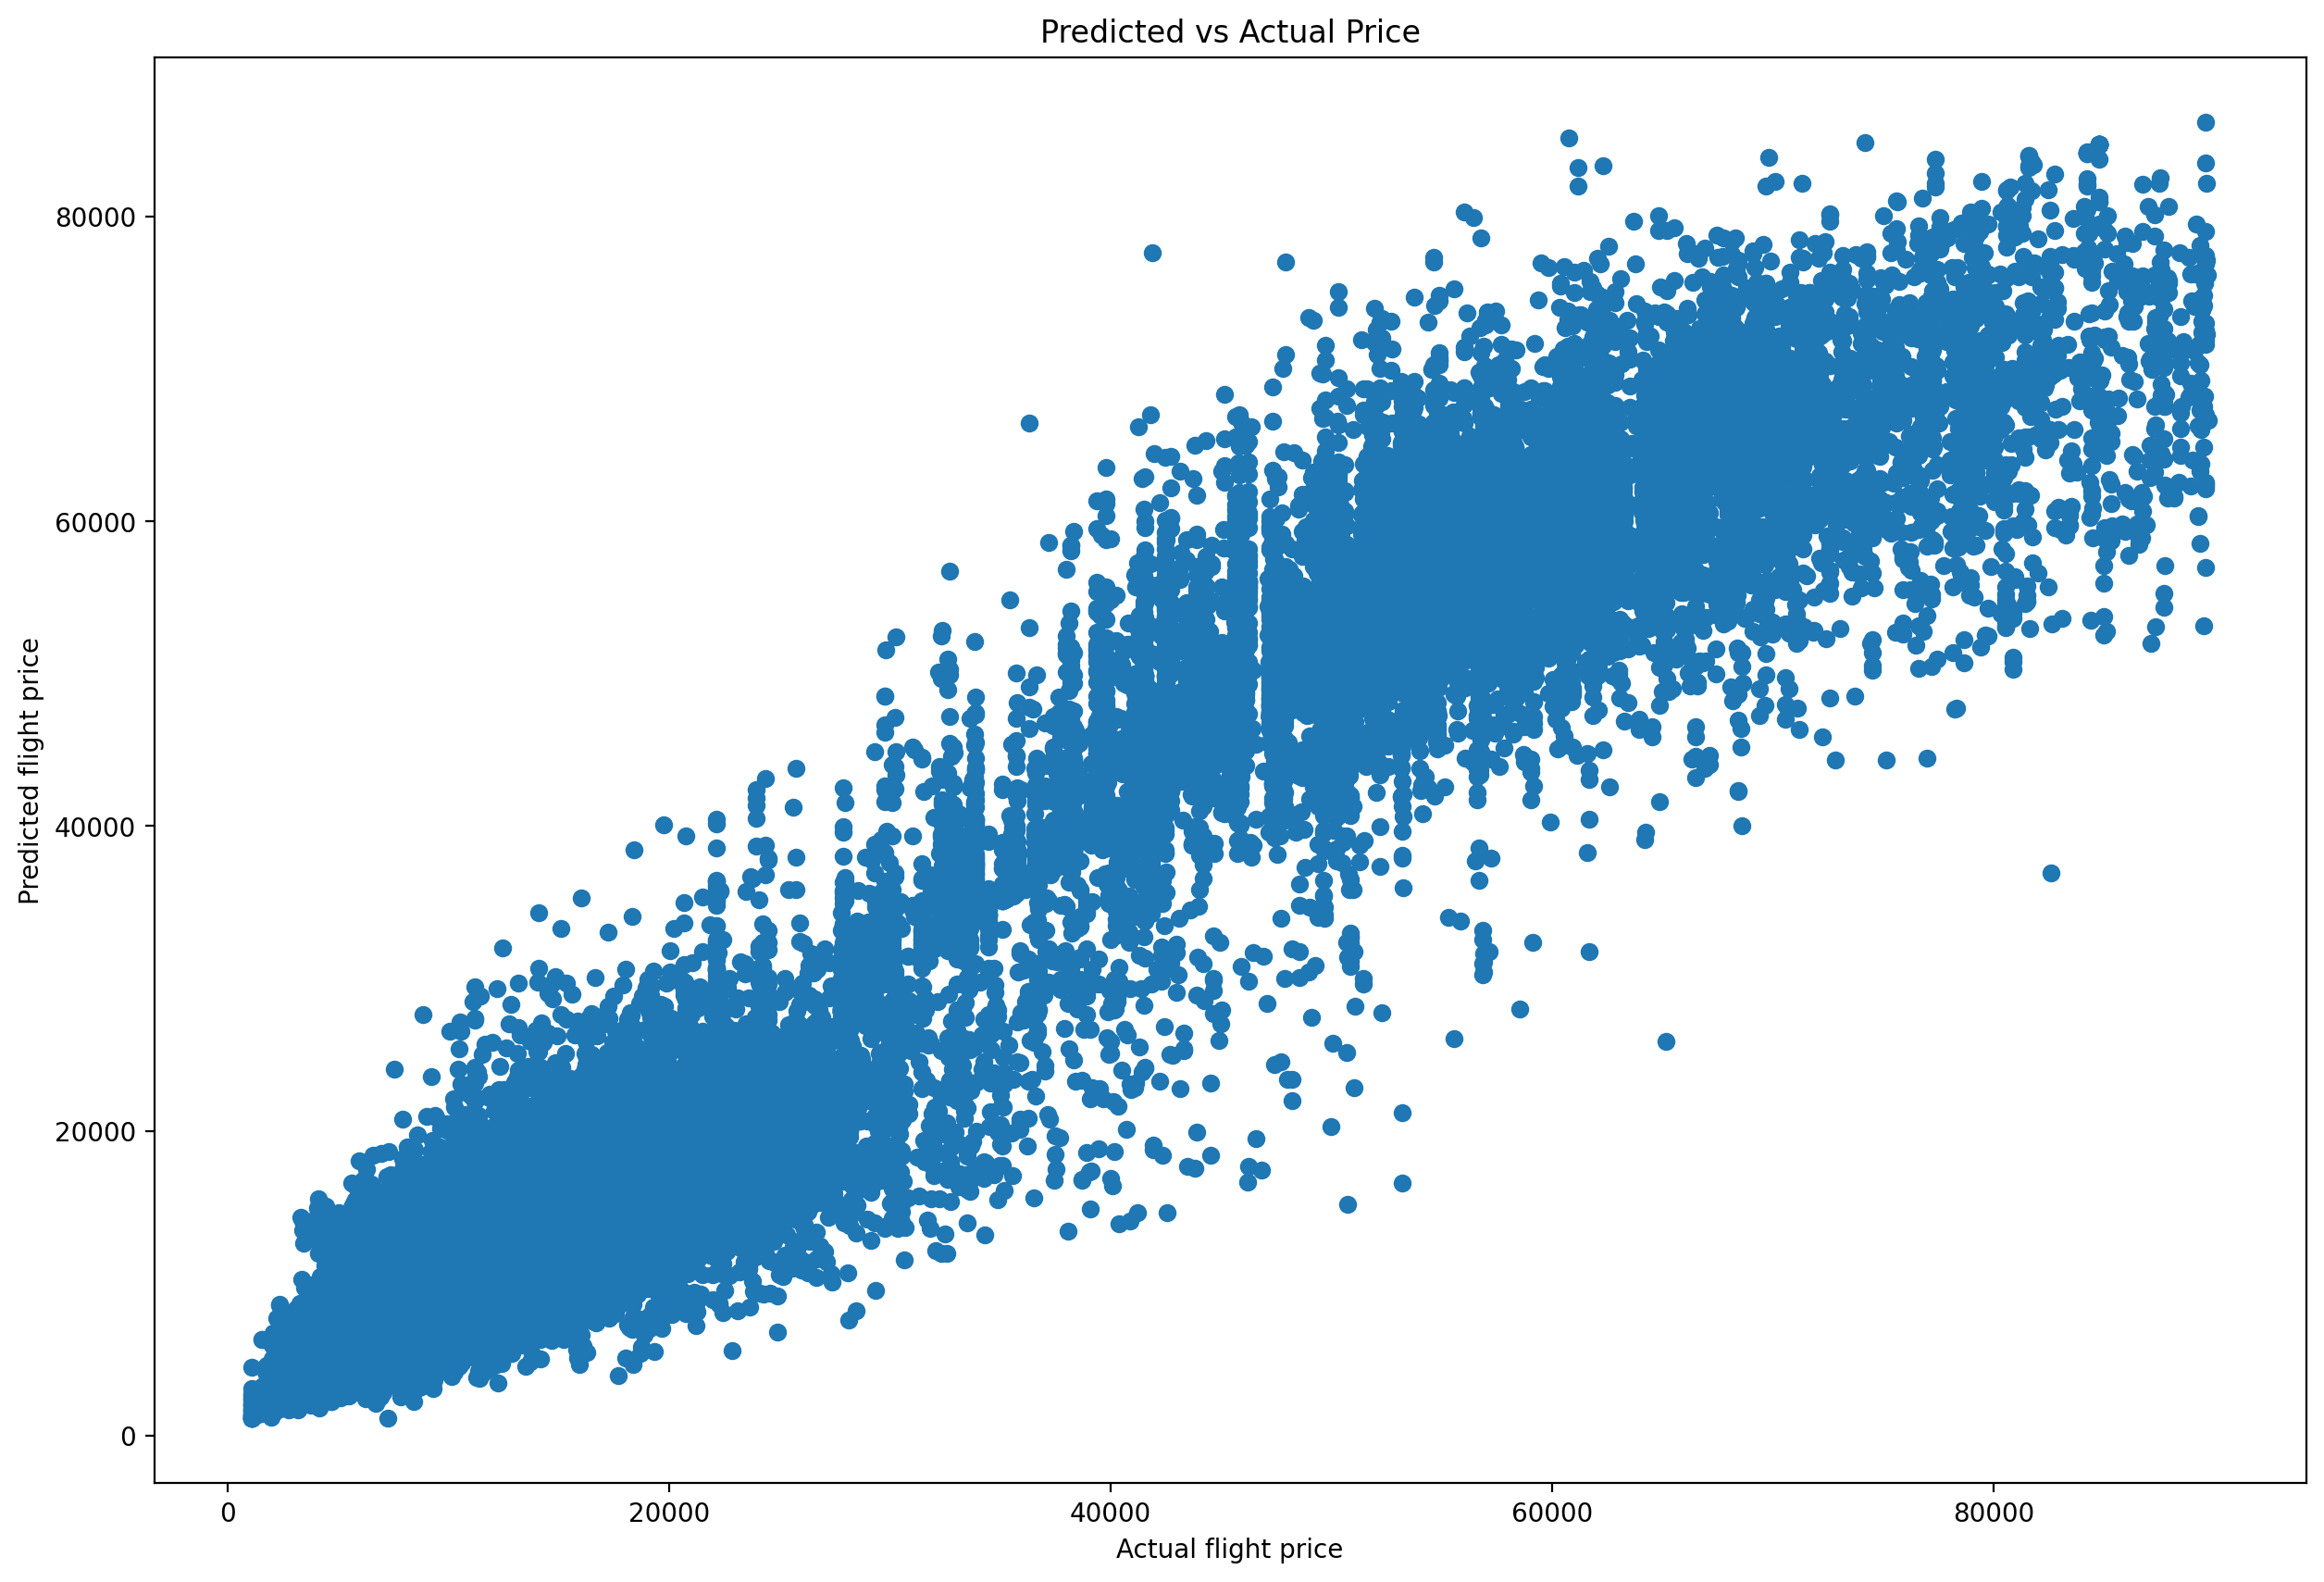

In [79]:
plt.figure(figsize=(15,10),dpi=200)
plt.scatter(ytest,ypred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title("Predicted vs Actual Price")

In [159]:
import pickle

# Save the model to a file
model_filename = 'FPP_Final.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")

# loading the model :
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)


Model saved to FPP_Final.pkl


In [82]:
import joblib

# Save the model to a file
model_filename = 'FPP_Final.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

# Load the model from the file
loaded_model = joblib.load(model_filename)


Model saved to FPP_Final.joblib


In [83]:
ypred=loaded_model.predict(xtest)
r2_score(ytest,ypred)

0.964069698608605

In [84]:
ypred=best_model.predict(xtest)

print('R2',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',math.sqrt(mean_squared_error(ytest,ypred)))

R2 0.964069698608605
MAE 2087.5930535541283
MSE 15734687.424112363
RMSE 3966.6972942376588


  - For Random Forest Regressor,
   
  #### Before
   - r2 Score 0.9600
   - MAE 2168.01
   - MSE 17488595.11
   - RMSE 4181.93
   
  #### After
   - R2 0.9640
   - MAE 2090.04
   - MSE 15752991.08
   - RMSE 3969.00


   - Before hyper tuning, R2 score = 96.00 %
   - After hyper tuning, R2 score = 96.40 %
     
     The value of MAE drops as well, indicating that we are successful in tunning our model

   --------------------
   - OLD---
   --------------------
   - For Random Forest Regressor,
   
  #### Before
   - r2 Score 0.9565 
   - MAE 2269.58
   - MSE 20116169.81
   - RMSE 4485.10
   
  #### After
   - R2 0.9608
   - MAE 2169.34
   - MSE 17917995.34
   - RMSE 4232.96


   - Before hyper tuning, R2 score =  95.65 %
   - After hyper tuning, R2 score = 96.08 %
     
     The value of MAE drops as well, indicating that we are successful in tunning our model

#### Conclusion
   - We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. 
        
      as a result, we have trained our Random Forest Regression model, to forecast fares of flight tickets, with an R2 score
      of 96.08 %.

In [ ]:
import pickle

# Save the model to a file
model_filename = 'unique.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_filename}")

# loading the model :
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
import joblib

# Save the model to a file
model_filename = 'unique.joblib'
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

# Load the model from the file
loaded_model = joblib.load(model_filename)


In [ ]:
ypred=loaded_model.predict(xtest)
r2_score(ytest,ypred)

In [ ]:
ypred=best_model.predict(xtest)

print('R2',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,ypred))
print('MSE',mean_squared_error(ytest,ypred))
print('RMSE',math.sqrt(mean_squared_error(ytest,ypred)))